<a href="https://colab.research.google.com/github/alonacode/AI/blob/main/My_20_practice_text_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

* Завантажте усі датафрейми
* Добавте до кожного стовпчик `labels` з відповідним йому класом(bussiness, sports, education, etc). назви класів беріть з назв файлів
* Об'єднайте всі датафрейми в один, див [pd.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)
* Створіть стовпчик `text` в якому зберігатиметься текст для подальшої роботи. Можети вибрати такі варіанти:
  * Взяти один зі стовпчиків `headline`, `description`, `content`
  * Об'єднати тексти зі стовпчиків `headline`, `description`, `content`
* Видаліть стовпчики `headline`, `description`, `content`, `url`
* Розділіть дані на тренувальні та тестові
* Застосуйте `TfidfVectorizer`
* Натренуйте модель
* Виведіть результати

**Додатково**
* У `MyTokenizer` добавте обробку тексту за допомогою `nltk`, застусуйте один з варіантів:
  * стематизація
  * лематизація(використайте `nltk.pos_tag` для визначення частини мови)
  * обидва варіанти
* Використайте `n-gram` для класифікації(можливо доведеться збільшити `max_features`)
* Натренуйте різні моделі:
  * [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
  * [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
  * [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) з параметром `kernel="linear"`
  * [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) з параметром `kernel="rbf"`
  * [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)
* Використайте `optuna` для підбору гіперпараметрів


# Дані про статті

In [2]:
import pandas as pd

df1 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/business_data.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/education_data.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/entertainment_data.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/sports_data.csv")
df5 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/technology_data.csv")

In [3]:
df1['labels'] = 'business'

In [4]:
df1

,headlines,description,content,url,category,labels
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business,business
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business,business
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business,business
3,Red Sea woes: Exporters seek increased credit ...,Rising attacks forced shippers to consider the...,Indian exporters have asked the central govern...,https://indianexpress.com/article/business/red...,business,business
4,Air India group to induct a plane every 6 days...,"Apart from fleet expansion, 2024 will also see...",The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business,business
...,...,...,...,...,...,...
1995,"Two official teams from India, EU to discuss c...",India raised these issues in the Trade and Tec...,India and the European Union have constituted ...,https://indianexpress.com/article/business/two...,business,business
1996,"Adani family sells $1 billion stake to GQG, ot...",The group's flagship Adani Enterprises Ltd saw...,US-based boutique investment firm GQG Partners...,https://indianexpress.com/article/business/com...,business,business
1997,Housing sales up 8% in April-June period acros...,Housing sales rose 8 per cent annually during ...,Housing sales rose 8 per cent annually during ...,https://indianexpress.com/article/business/hou...,business,business
1998,Spike in tomato prices temporary; rates will c...,The maximum price of Rs 122 per kg has been re...,The spurt in prices of tomato is a temporary s...,https://indianexpress.com/article/business/eco...,business,business


In [5]:
df2['labels']= 'education'
df2

,headlines,description,content,url,category,labels
0,CUET PG 2024: Register with NTA to enable admi...,CUET PG 2024: UGC said that the list of partic...,The Common University Entrance Test Postgradua...,https://indianexpress.com/article/education/cu...,education,education
1,Oxford ends ties with TCS iON over technical g...,"On April 10, 2023 TCS had announced that it ha...",Less than a year after the Oxford University s...,https://indianexpress.com/article/education/ox...,education,education
2,"Enrollments in Computer Engineering surge, mec...",AISHE Report 2021-22: The enrollment in STEM (...,Student enrollments in Computer Engineering ha...,https://indianexpress.com/article/education/en...,education,education
3,"NDMC plans to provide free JEE, NEET UG coachi...",The coaching partner will also provide up-to-d...,The New Delhi Municipal Council (NDMC) is invi...,https://indianexpress.com/article/education/nd...,education,education
4,"BA courses register highest enrollment, maximu...",AISHE Report 2021-22: For programmes including...,Bachelor of Arts (BA) courses had the highest ...,https://indianexpress.com/article/education/ba...,education,education
...,...,...,...,...,...,...
1995,"PSEB Class 10th Results 2023: When, where and ...",PSEB Class 10th Results 2023: The students wil...,PSEB Class 10th Results 2023: The Punjab Schoo...,https://indianexpress.com/article/education/ps...,education,education
1996,SAMS Odisha invites application for admission ...,The admission process will commence with accep...,"The Directorate of Higher Secondary Education,...",https://indianexpress.com/article/education/sa...,education,education
1997,"MPBSE MP Class 10th, 12th Supplementary exams ...","MPBSE MP Class 10, 12 Supplementary exams: Stu...","MPBSE MP Class 10, 12 Supplementary exams: The...",https://indianexpress.com/article/education/mp...,education,education
1998,KCET 2023: KEA releases provisional answer key...,KCET 2023: Candidates who appeared for the exa...,KCET 2023: The Karnataka Examination Authority...,https://indianexpress.com/article/education/kc...,education,education


In [6]:
df3['labels'] = 'entertainment'
df3

,headlines,description,content,url,category,labels
0,Bhumi Pednekar plays an investigative journali...,Bhumi Pednekar plays an investigative journali...,Actor Bhumi Pednekar is all set to take over t...,https://indianexpress.com/article/entertainmen...,entertainment,entertainment
1,Karan Johar channels his inner Rajinikanth in ...,Karan Johar and Kiara Advani featured in a new...,Karan Johar reunited with his Lust Stories sta...,https://indianexpress.com/article/entertainmen...,entertainment,entertainment
2,"‘Shah Rukh Khan is irreplaceable, actors will ...",Karan Johar opened up about the blurring lines...,Filmmaker Karan Johar declared the the concept...,https://indianexpress.com/article/entertainmen...,entertainment,entertainment
3,"Years after break-up with Divya Agarwal, Varun...",Varun Sood said that it is easy for him to for...,Ever since Divya Agarwal and Varun Sood parted...,https://indianexpress.com/article/entertainmen...,entertainment,entertainment
4,Guntur Kaaram box office collection Day 6: Mah...,Guntur Kaaram box office collection Day 6: Mah...,"On Tuesday (Day 5), Mahesh Babu’s latest relea...",https://indianexpress.com/article/entertainmen...,entertainment,entertainment
...,...,...,...,...,...,...
1995,Katrina Kaif reveals father-in-law Sham Kausha...,Katrina Kaif played the role of Zoya in Tiger ...,"Katrina Kaif’s father-in-law, Sham Kaushal, is...",https://indianexpress.com/article/entertainmen...,entertainment,entertainment
1996,Adipurush writer Manoj Muntashir explains what...,Manoj Muntashir also defended the Adipurush di...,Months after the release of the Prabhas and Kr...,https://indianexpress.com/article/entertainmen...,entertainment,entertainment
1997,Farah Khan says she learned discipline from wo...,Farah Khan started her career as a choreograph...,Farah Khan Kunder made her debut as a choreogr...,https://indianexpress.com/article/entertainmen...,entertainment,entertainment
1998,Tiger 3 box office collection Day 6 early repo...,Tiger 3 box office collection Day 6 early esti...,Salman Khan and Katrina Kaif starrer Tiger 3 w...,https://indianexpress.com/article/entertainmen...,entertainment,entertainment


In [7]:
df4['labels'] = 'sports'
df4

,headlines,description,content,url,category,labels
0,Jannik Sinner’s strong and improved baseline g...,Baseline strategy has been central to Jannik S...,"In a resolute, nerveless, three-hour-long disp...",https://indianexpress.com/article/sports/tenni...,sports,sports
1,Allan Border opens up about Parkinson’s diseas...,Former Australia captain says the disease has ...,Legendary Australia cricketer Allan Border has...,https://indianexpress.com/article/sports/crick...,sports,sports
2,Australian Open 2024: Jannik Sinner stops Nova...,"Sinner defeated Djokovic 6-1, 6-2, 6-7, 6-3 in...",Jannik Sinner has stunned Novak Djokovic to re...,https://indianexpress.com/article/sports/tenni...,sports,sports
3,‘It looked like a dead lbw’: Ben Duckett on Sh...,Duckett believes England are still in the game...,England opener Ben Duckett says Shubman Gill s...,https://indianexpress.com/article/sports/crick...,sports,sports
4,"In crunch time, Kiran George produces an aggre...",As Kiran George had missed out on opportunitie...,"Since the start of 2023, Kiran George had play...",https://indianexpress.com/article/sports/badmi...,sports,sports
...,...,...,...,...,...,...
1995,Watch: Rohit Sharma asks Ishan Kishan why desp...,"""Bhaiya yeh to aap btaoge, captain to aap the ...",Laughter broke out when Indian skipper Rohit S...,https://indianexpress.com/article/sports/crick...,sports,sports
1996,Argentine farmer grows 124-acre image of Lione...,The field in Los Condores in central Cordoba p...,In a distinct way of celebrating country’s FIF...,https://indianexpress.com/article/sports/footb...,sports,sports
1997,Man Utd vs Crystal Palace: Casemiro picks up f...,Casemiro has been one of United's best players...,As if a trip to high-flying Arsenal on Sunday ...,https://indianexpress.com/article/sports/footb...,sports,sports
1998,"Saudi Arabia set to profit from Ronaldo move, ...",The 37-year-old forward's contract with Al Nas...,Cristiano Ronaldo’s move to Al Nassr could lea...,https://indianexpress.com/article/sports/footb...,sports,sports


In [8]:
df5['labels'] = 'technology'
df5

,headlines,description,content,url,category,labels
0,Unlocking the science of E Ink displays: Why w...,That e-reader screen isn't magic - it's E Ink!...,"With their crisp, paper-like screens, e-reader...",https://indianexpress.com/article/technology/t...,technology,technology
1,Reddit is free education: 9 subreddits that ca...,These subreddits bring the best of the Interne...,"Education is the key to success, it not only l...",https://indianexpress.com/article/technology/f...,technology,technology
2,Nintendo Switching things up? Leaks suggest la...,Rumour has it the upcoming Nintendo Switch 2 w...,Rumours are heating up that Nintendo may unvei...,https://indianexpress.com/article/technology/g...,technology,technology
3,Epic’s Fortnite and new browser engines show c...,The EU's antitrust regulations are forcing App...,Apple is continuing to open up iOS to comply w...,https://indianexpress.com/article/technology/t...,technology,technology
4,Hubble finds water vapour on small exoplanet i...,Scientists have used the Hubble Space Telescop...,Astronomers used the Hubble Space Telescope to...,https://indianexpress.com/article/technology/s...,technology,technology
...,...,...,...,...,...,...
1995,Vivaldi’s privacy and customisability-focused ...,The Vivaldi browser is now available on iOS an...,"Vivaldi, the free browser founded by Opera co-...",https://indianexpress.com/article/technology/t...,technology,technology
1996,"From Meta Quest 3 to Ray Ban Smart Glasses, he...",The future is here. Meta unveils its next-gen ...,"Meta has concluded its Connect 2023 event, unv...",https://indianexpress.com/article/technology/t...,technology,technology
1997,Samsung Galaxy S24 rumoured to launch on Janua...,Samsung might shift the launch window of its u...,Samsung has been launching its Galaxy S series...,https://indianexpress.com/article/technology/m...,technology,technology
1998,"‘We continuously iterate… building prototypes,...",Dyson's success in floorcare tech lies in inno...,"“When things don’t go as planned, we return to...",https://indianexpress.com/article/technology/t...,technology,technology


In [9]:
together2 = pd.concat([df1, df2, df3, df4, df5])
together2

,headlines,description,content,url,category,labels
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business,business
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business,business
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business,business
3,Red Sea woes: Exporters seek increased credit ...,Rising attacks forced shippers to consider the...,Indian exporters have asked the central govern...,https://indianexpress.com/article/business/red...,business,business
4,Air India group to induct a plane every 6 days...,"Apart from fleet expansion, 2024 will also see...",The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business,business
...,...,...,...,...,...,...
1995,Vivaldi’s privacy and customisability-focused ...,The Vivaldi browser is now available on iOS an...,"Vivaldi, the free browser founded by Opera co-...",https://indianexpress.com/article/technology/t...,technology,technology
1996,"From Meta Quest 3 to Ray Ban Smart Glasses, he...",The future is here. Meta unveils its next-gen ...,"Meta has concluded its Connect 2023 event, unv...",https://indianexpress.com/article/technology/t...,technology,technology
1997,Samsung Galaxy S24 rumoured to launch on Janua...,Samsung might shift the launch window of its u...,Samsung has been launching its Galaxy S series...,https://indianexpress.com/article/technology/m...,technology,technology
1998,"‘We continuously iterate… building prototypes,...",Dyson's success in floorcare tech lies in inno...,"“When things don’t go as planned, we return to...",https://indianexpress.com/article/technology/t...,technology,technology


In [10]:
together2['text'] = together2['headlines']
together2

,headlines,description,content,url,category,labels,text
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business,business,Nirmala Sitharaman to equal Morarji Desai’s re...
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business,business,"‘Will densify network, want to be at least no...."
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business,business,Air India group to induct an aircraft every si...
3,Red Sea woes: Exporters seek increased credit ...,Rising attacks forced shippers to consider the...,Indian exporters have asked the central govern...,https://indianexpress.com/article/business/red...,business,business,Red Sea woes: Exporters seek increased credit ...
4,Air India group to induct a plane every 6 days...,"Apart from fleet expansion, 2024 will also see...",The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business,business,Air India group to induct a plane every 6 days...
...,...,...,...,...,...,...,...
1995,Vivaldi’s privacy and customisability-focused ...,The Vivaldi browser is now available on iOS an...,"Vivaldi, the free browser founded by Opera co-...",https://indianexpress.com/article/technology/t...,technology,technology,Vivaldi’s privacy and customisability-focused ...
1996,"From Meta Quest 3 to Ray Ban Smart Glasses, he...",The future is here. Meta unveils its next-gen ...,"Meta has concluded its Connect 2023 event, unv...",https://indianexpress.com/article/technology/t...,technology,technology,"From Meta Quest 3 to Ray Ban Smart Glasses, he..."
1997,Samsung Galaxy S24 rumoured to launch on Janua...,Samsung might shift the launch window of its u...,Samsung has been launching its Galaxy S series...,https://indianexpress.com/article/technology/m...,technology,technology,Samsung Galaxy S24 rumoured to launch on Janua...
1998,"‘We continuously iterate… building prototypes,...",Dyson's success in floorcare tech lies in inno...,"“When things don’t go as planned, we return to...",https://indianexpress.com/article/technology/t...,technology,technology,"‘We continuously iterate… building prototypes,..."


In [11]:
together2 = together2.drop(columns=['headlines', 'description', 'content', 'url'])
together2

,category,labels,text
0,business,business,Nirmala Sitharaman to equal Morarji Desai’s re...
1,business,business,"‘Will densify network, want to be at least no...."
2,business,business,Air India group to induct an aircraft every si...
3,business,business,Red Sea woes: Exporters seek increased credit ...
4,business,business,Air India group to induct a plane every 6 days...
...,...,...,...
1995,technology,technology,Vivaldi’s privacy and customisability-focused ...
1996,technology,technology,"From Meta Quest 3 to Ray Ban Smart Glasses, he..."
1997,technology,technology,Samsung Galaxy S24 rumoured to launch on Janua...
1998,technology,technology,"‘We continuously iterate… building prototypes,..."


In [12]:
class MyTokenizer:
     def __init__(self):
         self.some_args = None
     def __call__(self, text):
         return text.split()

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


X = together2['text']
y = together2['labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)


vectorizer = TfidfVectorizer(stop_words='english', max_features=10_000)

# Підготовка тренувальних та тестових даних
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Перевіряємо результат
print(f"Розмір X_train: {X_train.shape}")
print(f"Розмір X_test: {X_test.shape}")


Розмір X_train: (8000, 10000)
Розмір X_test: (2000, 10000)


In [32]:
X_train

<8000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 76168 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(4719+1)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [16]:
pca.explained_variance_ratio_.sum()

0.9685145485628849

In [17]:
pca.explained_variance_ratio_.cumsum()

array([0.00325878, 0.00853825, 0.01262443, ..., 0.96846208, 0.96848833,
       0.96851455])

In [26]:
import numpy as np

np.where(pca.explained_variance_ratio_.cumsum() >= 0.96)

(array([4719, 4720, 4721, 4722, 4723, 4724, 4725, 4726, 4727, 4728, 4729,
        4730, 4731, 4732, 4733, 4734, 4735, 4736, 4737, 4738, 4739, 4740,
        4741, 4742, 4743, 4744, 4745, 4746, 4747, 4748, 4749, 4750, 4751,
        4752, 4753, 4754, 4755, 4756, 4757, 4758, 4759, 4760, 4761, 4762,
        4763, 4764, 4765, 4766, 4767, 4768, 4769, 4770, 4771, 4772, 4773,
        4774, 4775, 4776, 4777, 4778, 4779, 4780, 4781, 4782, 4783, 4784,
        4785, 4786, 4787, 4788, 4789, 4790, 4791, 4792, 4793, 4794, 4795,
        4796, 4797, 4798, 4799, 4800, 4801, 4802, 4803, 4804, 4805, 4806,
        4807, 4808, 4809, 4810, 4811, 4812, 4813, 4814, 4815, 4816, 4817,
        4818, 4819, 4820, 4821, 4822, 4823, 4824, 4825, 4826, 4827, 4828,
        4829, 4830, 4831, 4832, 4833, 4834, 4835, 4836, 4837, 4838, 4839,
        4840, 4841, 4842, 4843, 4844, 4845, 4846, 4847, 4848, 4849, 4850,
        4851, 4852, 4853, 4854, 4855, 4856, 4857, 4858, 4859, 4860, 4861,
        4862, 4863, 4864, 4865, 4866, 

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced")

model.fit(X_train, y_train)
model

LogisticRegression(class_weight='balanced')

In [29]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.93      0.93      0.93       400
    education       0.98      0.94      0.96       400
entertainment       0.93      0.95      0.94       400
       sports       0.92      0.95      0.93       400
   technology       0.92      0.91      0.91       400

     accuracy                           0.94      2000
    macro avg       0.94      0.94      0.94      2000
 weighted avg       0.94      0.94      0.94      2000



[]

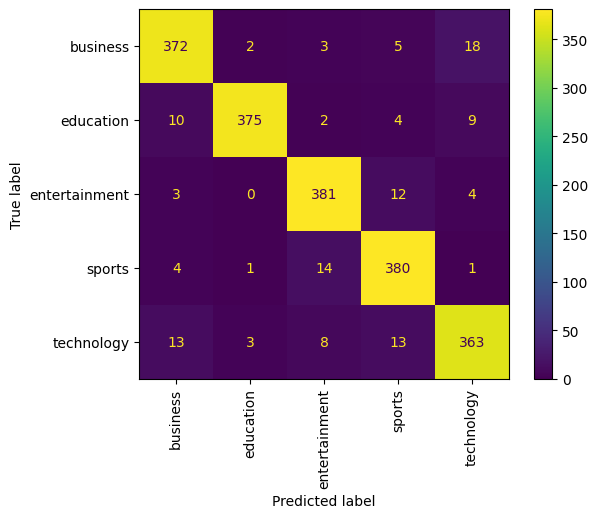

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()

In [22]:
from sklearn.pipeline import Pipeline

final_model = Pipeline(steps=[
    ('vectorizer', vectorizer),
    ('pca', pca),
    ('model', model)
])

final_model


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=10000, stop_words='english')),
                ('pca', TruncatedSVD(n_components=5000)),
                ('model', LogisticRegression(class_weight='balanced'))])